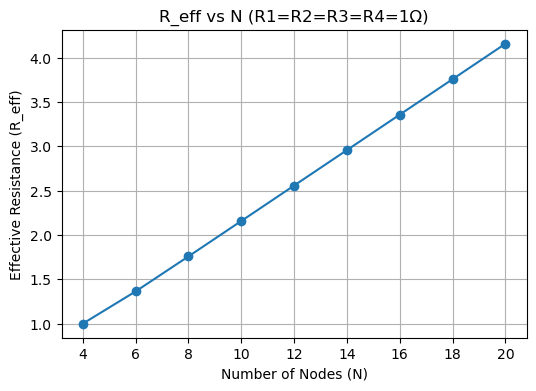

In [21]:
import numpy as np
import matplotlib.pyplot as plt


# R1: resistor between even nodes (top)
# R2: resistor between odd nodes (bottom)
# R3: resistor between odd->even (diagonal up-right)
# R4: resistor between even->odd (diagonal down-right)
    

def r_network(N, R1, R2, R3, R4):
    
    g1, g2, g3, g4 = 1/R1, 1/R2, 1/R3, 1/R4  # conductances
    G = np.zeros((N, N))  # conductance matrix
    b = np.zeros(N)       # current injection vector

    for i in range(N):
        # Node number (1-based): i+1
        # Horizontal neighbors ±2
        if (i % 2) == 0:  # odd node (bottom row)
            if i + 2 < N:  # right neighbor
                G[i,i] += g2; G[i,i+2] -= g2
                G[i+2,i] -= g2; G[i+2,i+2] += g2
        else:  # even node (top row)
            if i + 2 < N:
                G[i,i] += g1; G[i,i+2] -= g1
                G[i+2,i] -= g1; G[i+2,i+2] += g1

        # Diagonal neighbors ±1
        if i + 1 < N:
            if (i % 2) == 0:  # odd node connects right via R3
                G[i,i] += g3; G[i,i+1] -= g3
                G[i+1,i] -= g3; G[i+1,i+1] += g3
            else:  # even node connects right via R4
                G[i,i] += g4; G[i,i+1] -= g4
                G[i+1,i] -= g4; G[i+1,i+1] += g4

    # Inject 1A at node 0 (V1), ground last node
    b[0] = 1.0
    G_reduced = G[:-1, :-1]
    b_reduced = b[:-1]

    V = np.linalg.solve(G_reduced, b_reduced)
    return V[0]  # Effective resistance (since current=1A)

# Test for R1=R2=R3=R4=1 Ohm
Ns = [4, 6, 8, 10, 12, 14, 16, 18, 20]  # must be even to form a closed ladder
R_eff = [r_network(N, 1, 1, 1, 1) for N in Ns]


fig, ax = plt.subplots(figsize=(6,4))
ax.plot(Ns, R_eff, marker='o')
ax.set_title("R_eff vs N (R1=R2=R3=R4=1Ω)")
ax.set_xlabel("Number of Nodes (N)")
ax.set_ylabel("Effective Resistance (R_eff)")
ax.grid(True)
plt.savefig("R_eff vs N.png")
plt.show()

